In [66]:
import torch
import torch.nn as nn
# from generate_data import *
import matplotlib.pyplot as plt
import numpy as np
import math 
from load_matlab_timedata import get_data_from
from torch.utils.data import Dataset, DataLoader, SequentialSampler, BatchSampler
import sklearn.preprocessing 

In [2]:
import torch.utils.data

In [7]:
import numpy as np
import h5py


def get_data_from(data_file_name):
    outfile = h5py.File(data_file_name, 'r')
    print(outfile.keys())
    data = outfile['ans']
    return data



In [55]:
from torch.utils.data import Dataset, DataLoader, SequentialSampler
import sklearn.preprocessing 
class TimeSeriesDataset(Dataset):
    """Loads dataset from matlab file and provides batching interface"""

    def __init__(self, mat_file, retrospective_steps, need_normalize, leave_nth = 1, transform=None):
        """
        Args:
            mat_file (string): Path to the mat file with annotations.
            root_dir (string): Directory with all the images.
            
            transform (callable, optional): Optional transform to be applied
            
                on a sample.
        """
        outfile = h5py.File(mat_file, 'r')
        print(outfile.keys())
        self.data  = outfile['ans']
        time, x, y = self.data[::leave_nth, 0], self.data[::leave_nth, 1], self.data[::leave_nth, 2]
        if need_normalize:
            x_normalized, self.x_norms = sklearn.preprocessing.normalize(x.reshape(-1,1),
                                                      axis = 0,
                                                      norm = 'max',
                                                      return_norm = True)
            y_normalized, self.y_norms = sklearn.preprocessing.normalize(y.reshape(-1,1),
                                                      axis = 0,
                                                      norm = 'max', 
                                                      return_norm = True)
            x = x_normalized
            y = y_normalized
            
        x_sliding = []  # determines number of steps for retrospective view
        for i in range(1,retrospective_steps+1):
            x_sliding.append(x[i:-(retrospective_steps+1-i)])
        y = y[retrospective_steps:]
        print(y.shape)
        self.x = torch.from_numpy(np.array(x_sliding)).type(torch.Tensor)
        self.y = torch.from_numpy(y).type(torch.Tensor).view(-1)
        print(self.y.shape)
        self.transform = transform

    def __len__(self):
        return self.y.shape[0]

    def __getitem__(self, idx):
        return self.x[:, idx], self.y[idx], idx
#         img_name = os.path.join(self.root_dir,
#                                 self.landmarks_frame.iloc[idx, 0])
#         image = io.imread(img_name)
#         landmarks = self.landmarks_frame.iloc[idx, 1:].as_matrix()
#         landmarks = landmarks.astype('float').reshape(-1, 2)
#         sample = {'image': image, 'landmarks': landmarks}

#         if self.transform:
#             sample = self.transform(sample)

#         return sample

In [56]:
ts_ds = TimeSeriesDataset('DC_motor_simulation/res.mat', 128, True, leave_nth=13)

<KeysViewHDF5 ['ans']>
(76796, 1)
torch.Size([76796])


In [68]:
d_l = DataLoader(dataset = ts_ds,
                 batch_sampler = BatchSampler(sampler = SequentialSampler(ts_ds), 
                              batch_size = 128, drop_last = True))

In [69]:
d_l

tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
         42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
        126, 127])


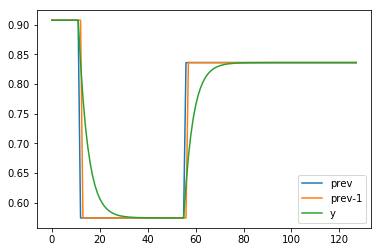

torch.Size([128])
torch.Size([128, 128, 1])
tensor([128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
        184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
        198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
        212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
        226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239,
        240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253,
        254, 255])


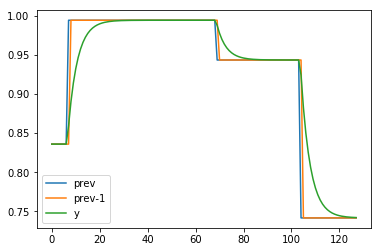

torch.Size([128])
torch.Size([128, 128, 1])
tensor([256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
        270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283,
        284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297,
        298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311,
        312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
        326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339,
        340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
        354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367,
        368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381,
        382, 383])


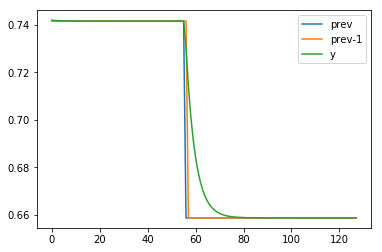

torch.Size([128])
torch.Size([128, 128, 1])
tensor([384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397,
        398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411,
        412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
        426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
        440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453,
        454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467,
        468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481,
        482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495,
        496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509,
        510, 511])


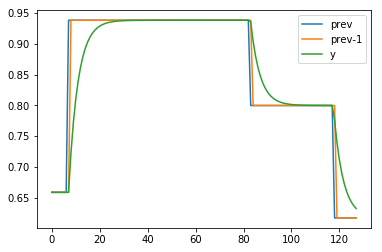

torch.Size([128])
torch.Size([128, 128, 1])


In [70]:
for i, data in enumerate(d_l):
    x_batch, y_batch, idx = data
    print(idx)
    plt.plot(x_batch.detach().numpy()[-1], label = 'prev')
    #plt.show()
    plt.plot(x_batch.detach().numpy()[-2], label = 'prev-1')
    #plt.show()
    plt.plot(y_batch.detach().numpy(), label = 'y')
    plt.legend()
    plt.show()
    print(y_batch.shape)
    print(x_batch.shape)
    if i == 3:
        break

In [62]:
?Dataset

Init signature: Dataset()
Docstring:     
An abstract class representing a Dataset.

All other datasets should subclass it. All subclasses should override
``__len__``, that provides the size of the dataset, and ``__getitem__``,
supporting integer indexing in range from 0 to len(self) exclusive.
File:           ~/miniconda3/envs/dkushn_dyploma/lib/python3.7/site-packages/torch/utils/data/dataset.py
Type:           type
Subclasses:     TensorDataset, ConcatDataset, Subset, TimeSeriesDataset, TimeSeriesDataset, TimeSeriesDataset, TimeSeriesDataset, TimeSeriesDataset


In [61]:
? SequentialSampler

Init signature:  SequentialSampler(data_source)
Docstring:     
Samples elements sequentially, always in the same order.

Arguments:
    data_source (Dataset): dataset to sample from
File:           ~/miniconda3/envs/dkushn_dyploma/lib/python3.7/site-packages/torch/utils/data/sampler.py
Type:           type
Subclasses:     


In [14]:
? DataLoader

Init signature:
 DataLoader(
    dataset,
    batch_size=1,
    shuffle=False,
    sampler=None,
    batch_sampler=None,
    num_workers=0,
    collate_fn=<function default_collate at 0x7f35dc9bc158>,
    pin_memory=False,
    drop_last=False,
    timeout=0,
    worker_init_fn=None,
)
Docstring:     
Data loader. Combines a dataset and a sampler, and provides
single- or multi-process iterators over the dataset.

Arguments:
    dataset (Dataset): dataset from which to load the data.
    batch_size (int, optional): how many samples per batch to load
        (default: ``1``).
    shuffle (bool, optional): set to ``True`` to have the data reshuffled
        at every epoch (default: ``False``).
    sampler (Sampler, optional): defines the strategy to draw samples from
        the dataset. If specified, ``shuffle`` must be False.
    batch_sampler (Sampler, optional): like sampler, but returns a batch of
        indices at a time. Mutually exclusive with :attr:`batch_size`,
        :attr:`sh

In [ ]:
def collate_fn(data):
    """Creates mini-batch tensors from the list of tuples (image, caption).
    
    We should build custom collate_fn rather than using default collate_fn, 
    because merging caption (including padding) is not supported in default.
    Args:
        data: list of tuple (image, caption). 
            - image: torch tensor of shape (3, 256, 256).
            - caption: torch tensor of shape (?); variable length.
    Returns:
        images: torch tensor of shape (batch_size, 3, 256, 256).
        targets: torch tensor of shape (batch_size, padded_length).
        lengths: list; valid length for each padded caption.
    """
#     # Sort a data list by caption length (descending order).
#     data.sort(key=lambda x: len(x[1]), reverse=True)
#     images, captions = zip(*data)

    x_batch = []
    for i in range(1,input_size+1):
        x_batches.append(x[i:-(input_size+1-i)])
    x = np.array(x_batches)
    y = y[input_size:] 